# **Name: SHUJAH ABDUR RAFAY**
# **Roll No: FA21-BCS-207**
# **Lab Assignment** **01**

# `TASK 01#`


# **BFS and DFS on a Graph:**

In [3]:
from collections import deque

# Graph representation using adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

def bfs(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            print(vertex, end=' ')

            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    queue.append(neighbor)

def dfs(graph, start):
    visited = set()

    def dfs_recursive(vertex):
        visited.add(vertex)
        print(vertex, end=' ')

        for neighbor in graph[vertex]:
            if neighbor not in visited:
                dfs_recursive(neighbor)

    dfs_recursive(start)

# Test BFS and DFS on the graph
print("BFS traversal:")
bfs(graph, 'A')
print("\nDFS traversal:")
dfs(graph, 'A')

BFS traversal:
A B C D E F 
DFS traversal:
A B D E F C 

# BFS and DFS on a Tree:

In [2]:
from collections import deque

# Tree representation using nested lists
tree = ['A', ['B', ['D', [], []], ['E', [], []]], ['C', ['F', [], []], ['G', [], []]]]

def bfs_tree(tree):
    queue = deque([tree])

    while queue:
        node = queue.popleft()
        if node:
            data, left, right = node[0], node[1], node[2]
            print(data, end=' ')

            if left:
                queue.append(left)
            if right:
                queue.append(right)

def dfs_tree(tree):
    if tree:
        data, left, right = tree[0], tree[1], tree[2]
        print(data, end=' ')
        dfs_tree(left)
        dfs_tree(right)

# Test BFS and DFS on the tree
print("BFS traversal:")
bfs_tree(tree)
print("\nDFS traversal:")
dfs_tree(tree)

BFS traversal:
A B C D E F G 
DFS traversal:
A B D E C F G 

# `TASK 02#`


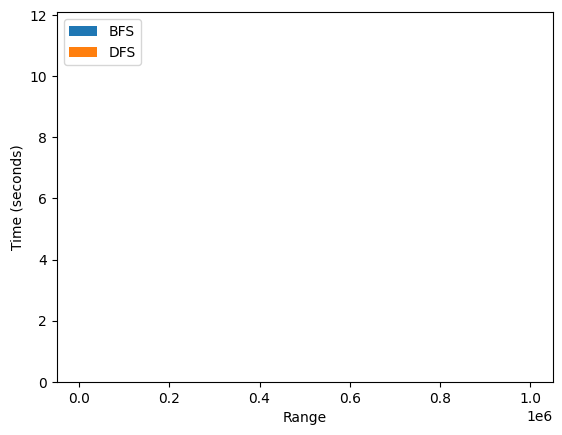

In [4]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Generate random and unique numbers within a specific range
def generate_numbers(start, end, count):
    numbers = random.sample(range(start, end + 1), count)
    return numbers

# Step 3: Build a tree using the generated numbers
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

def build_tree(numbers):
    root = None
    for num in numbers:
        root = insert_node(root, num)
    return root

def insert_node(root, val):
    if root is None:
        return TreeNode(val)
    if val < root.val:
        root.left = insert_node(root.left, val)
    else:
        root.right = insert_node(root.right, val)
    return root

# Step 4: BFS and DFS traversal on the tree
def bfs_tree(root):
    if not root:
        return []

    result = []
    queue = [root]

    while queue:
        node = queue.pop(0)
        result.append(node.val)

        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

    return result

def dfs_tree(root):
    if not root:
        return []

    result = []
    stack = [root]

    while stack:
        node = stack.pop()
        result.append(node.val)

        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)

    return result

# Step 5: Generate sets of random numbers and perform BFS and DFS on each set
input_ranges = [1000, 40000, 80000, 200000, 1000000]
results = []

for range_end in input_ranges:
    numbers = generate_numbers(1, range_end, range_end)
    tree = build_tree(numbers)

    start_time = time.time()
    bfs_result = bfs_tree(tree)
    bfs_time = time.time() - start_time

    start_time = time.time()
    dfs_result = dfs_tree(tree)
    dfs_time = time.time() - start_time

    result = {
        'Range': range_end,
        'BFS Time': bfs_time,
        'DFS Time': dfs_time
    }
    results.append(result)

# Step 6: Create a DataFrame from the results and plot a bar chart
df = pd.DataFrame(results)
plt.bar(df['Range'], df['BFS Time'], label='BFS')
plt.bar(df['Range'], df['DFS Time'], label='DFS')
plt.xlabel('Range')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()


# `TASK 03#`

## A* search to find the resulting path from maze:

In [14]:
from collections import deque

def solve_maze(maze, start, exit):
    queue = deque()
    visited = set()
    parent = {}

    queue.append(start)
    visited.add(start)

    while queue:
        current = queue.popleft()

        if current == exit:
            # Path found, backtrack to get the path
            path = []
            while current != start:
                path.append(current)
                current = parent[current]
            path.append(start)
            path.reverse()
            return path

        # Check adjacent nodes
        for action in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            next_node = (current[0] + action[0], current[1] + action[1])
            if next_node in maze and next_node not in visited:
                queue.append(next_node)
                visited.add(next_node)
                parent[next_node] = current

    # No path found
    return None

# Example usage
maze = {(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)}
start = (0, 0)
exit = (3, 3)

path = solve_maze(maze, start, exit)
if path:
    print("Path found:", path)
else:
    print("No path found")

Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]


# `TASK 04#`


# Alpha-Beta Pruning using python.

In [16]:
def alpha_beta_pruning(node, depth, alpha, beta, maximizing_player):
    if depth == 0 or is_terminal(node):
        return evaluate(node)

    if maximizing_player:
        value = float('-inf')
        for child in generate_children(node):
            value = max(value, alpha_beta_pruning(child, depth - 1, alpha, beta, False))
            alpha = max(alpha, value)
            if alpha >= beta:
                break  # Beta cutoff
        return value
    else:
        value = float('inf')
        for child in generate_children(node):
            value = min(value, alpha_beta_pruning(child, depth - 1, alpha, beta, True))
            beta = min(beta, value)
            if alpha >= beta:
                break  # Alpha cutoff
        return value
